In [1]:
library(repr)
library(ggplot2)
library(ggmap)

# Working with ggmap:

* Normally The CRS System has Latitude and Longitude Data. The Positions are Lat E, Lat W, Long N and Long S. However to represent it in a numeric fashon, intead of considering E, W, N and S, the system uses -ve sign for W and S. 

In [2]:
dataDir <- '/Users/sam/All-Program/App-DataSet/Study/GeoSpatial-Analysis/Crimes2015.csv'
dataDir2 <- '/Users/sam/All-Program/App-DataSet/Study/GeoSpatial-Analysis/Crimes2015_NA_rmv_sampl.csv'

crimeData <- read.csv(dataDir)

# Let us immediately omit NA's 
crimeData <- na.omit(crimeData)

# We dont want our plots to be very messy,
# Since we are gonna make map plots, its better
# to sample a small set of data (Possible 1000 Points).
set.seed(4389)
rows <- sample(1:nrow(crimeData), 10000)
crimeData <- crimeData[rows, ]

# We Store this small dataset to be used later
write.csv(crimeData, dataDir2)

In [3]:
# Here we load the NA celaned Data set
crimeData <- read.csv(dataDir2)
dim(crimeData)
head(crimeData)

[1] 10000    23

X      ID       Case.Number Date                   Block                 
1 227833 10323878 HY513662    11/15/2015 11:27:00 PM 064XX N DAMEN AVE     
2 168966 10218533 HY404964    08/31/2015 05:21:00 PM 029XX N CICERO AVE    
3 138050 10162542 HY350931    07/22/2015 12:30:00 PM 064XX W FULLERTON AVE 
4 256354 10219461 HY398367    08/26/2015 03:30:00 PM 011XX W WILSON AVE    
5 101156 10096236 HY284755    05/29/2015 12:30:00 PM 002XX N KEELER AVE    
6  65556 10032173 HY221676    04/14/2015 06:30:00 AM 072XX S MARSHFIELD AVE
  IUCR Primary.Type    Description                   
1 2826 OTHER OFFENSE   HARASSMENT BY ELECTRONIC MEANS
2 1310 CRIMINAL DAMAGE TO PROPERTY                   
3 0820 THEFT           $500 AND UNDER                
4 0820 THEFT           $500 AND UNDER                
5 0890 THEFT           FROM BUILDING                 
6 1310 CRIMINAL DAMAGE TO PROPERTY                   
  Location.Description          Arrest ⋯ Ward Community.Area FBI.Code
1 APARTMENT                     false  ⋯ 50    2             26      
2 GAS STATION                   false  ⋯ 31   19             14      
3 ATHLETIC CLUB                 false  ⋯ 36   19             06      
4 SIDEWALK                      false  ⋯ 46    3             06      
5 SCHOOL, PUBLIC, BUILDING      false  ⋯ 28   26             06      
6 RESIDENTIAL YARD (FRONT/BACK) false  ⋯ 17   67             14      
  X.Coordinate Y.Coordinate Year Updated.On             Latitude Longitude
1 1161794      1942800      2015 11/26/2015 03:54:17 PM 41.99872 -87.68016
2 1143863      1919315      2015 09/10/2015 11:43:14 AM 41.93463 -87.74672
3 1133118      1915251      2015 08/17/2015 03:03:40 PM 41.92367 -87.78630
4 1167904      1930702      2015 04/15/2016 03:49:27 PM 41.96539 -87.65804
5 1148358      1900901      2015 08/17/2015 03:03:40 PM 41.88401 -87.73067
6 1166597      1856657      2015 08/17/2015 03:03:40 PM 41.76223 -87.66496
  Location                     
1 (41.998718085, -87.680162979)
2 (41.934629749, -87.746717696)
3 (41.923672617, -87.786301606)
4 (41.965390764, -87.658037135)
5 (41.884014312, -87.730673844)
6 (41.762233087, -87.664962179)

In [4]:
str(crimeData)
unique(crimeData$Primary.Type)

'data.frame':	10000 obs. of  23 variables:
 $ X                   : int  227833 168966 138050 256354 101156 65556 92283 195847 137883 2728 ...
 $ ID                  : int  10323878 10218533 10162542 10219461 10096236 10032173 10080516 10266892 10162001 9914551 ...
 $ Case.Number         : Factor w/ 10000 levels "HA244376","HY100087",..: 8966 6462 5296 6308 3814 2422 3463 7614 5279 59 ...
 $ Date                : Factor w/ 9089 levels "01/01/2015 01:00:00 PM",..: 8023 5989 4957 5846 3502 2321 3284 6995 4940 71 ...
 $ Block               : Factor w/ 6876 levels "0000X E 100TH PL",..: 5266 2840 5333 1297 298 5703 1502 3112 1212 2724 ...
 $ IUCR                : Factor w/ 222 levels "0110","0142",..: 181 101 60 60 66 101 59 101 59 10 ...
 $ Primary.Type        : Factor w/ 30 levels "ARSON","ASSAULT",..: 23 7 29 29 29 7 29 7 29 26 ...
 $ Description         : Factor w/ 209 levels "$500 AND UNDER",..: 97 188 1 1 92 188 138 188 138 31 ...
 $ Location.Description: Factor w/ 95 levels "","ABAN

[1] OTHER OFFENSE                     CRIMINAL DAMAGE                  
 [3] THEFT                             ROBBERY                          
 [5] DECEPTIVE PRACTICE                MOTOR VEHICLE THEFT              
 [7] BURGLARY                          BATTERY                          
 [9] CRIMINAL TRESPASS                 PROSTITUTION                     
[11] NARCOTICS                         ASSAULT                          
[13] INTIMIDATION                      SEX OFFENSE                      
[15] OFFENSE INVOLVING CHILDREN        GAMBLING                         
[17] INTERFERENCE WITH PUBLIC OFFICER  PUBLIC PEACE VIOLATION           
[19] CRIM SEXUAL ASSAULT               LIQUOR LAW VIOLATION             
[21] ARSON                             WEAPONS VIOLATION                
[23] HOMICIDE                          KIDNAPPING                       
[25] STALKING                          HUMAN TRAFFICKING                
[27] OBSCENITY                         CONCEALED CARRY LICENSE VIOLATION
[29] NON - CRIMINAL                    NON-CRIMINAL                     
30 Levels: ARSON ASSAULT BATTERY BURGLARY ... WEAPONS VIOLATION

# Different ggmap plotting:
-----

#### Plot: | maptype=terrain && source=google

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=chicago&zoom=12&size=640x640&scale=1&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chicago&sensor=false
Warning message:
“Removed 5683 rows containing missing values (geom_point).”

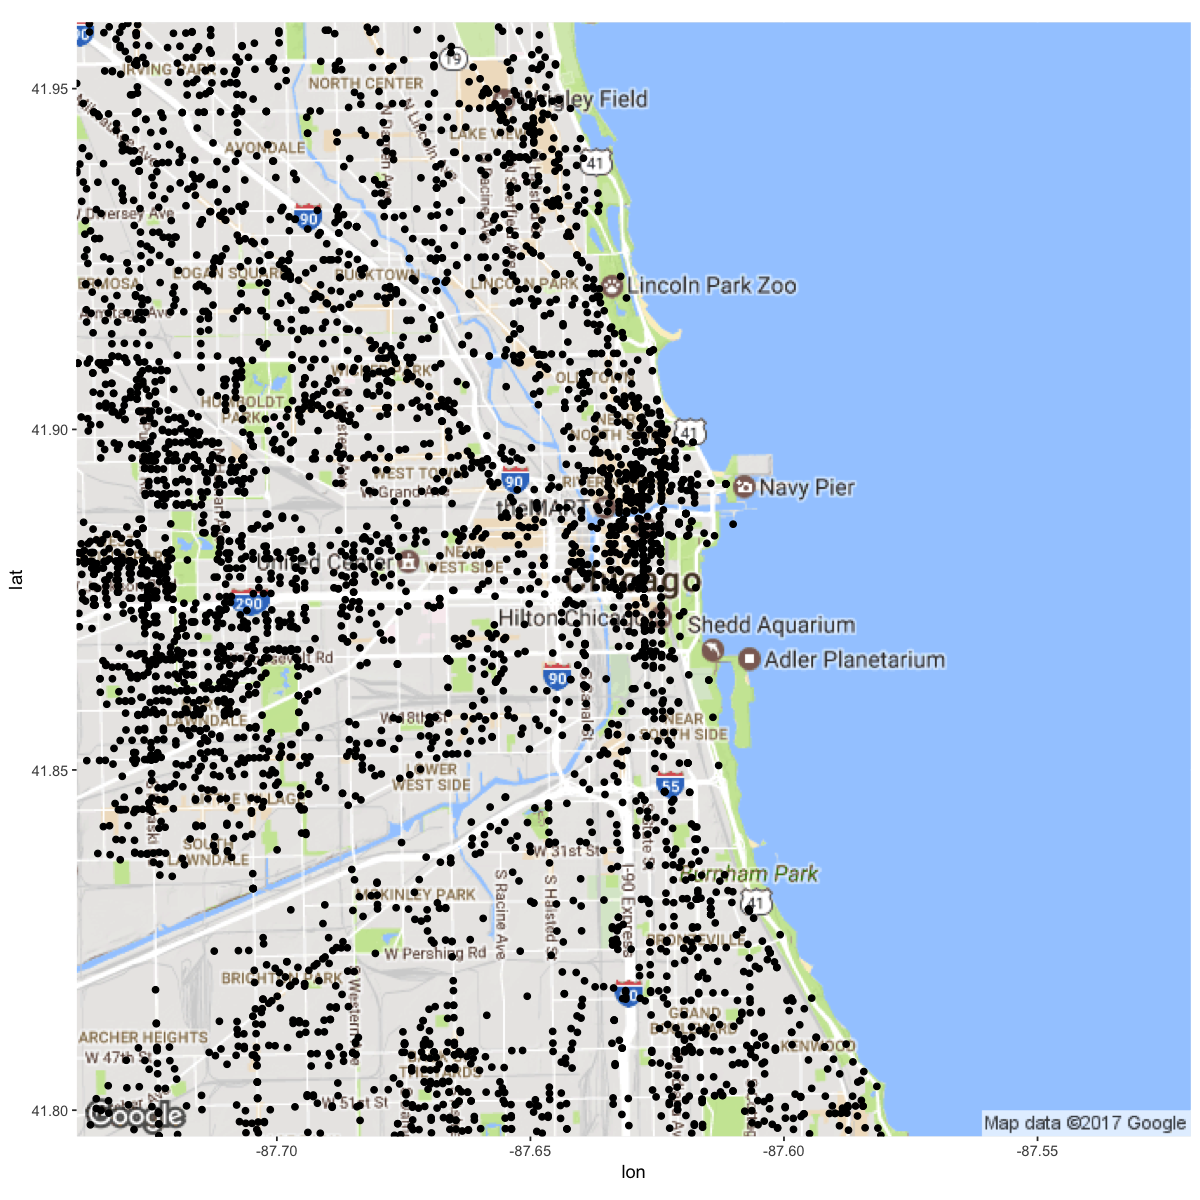

In [8]:
# Set the plot size
options(repr.plot.width=10, repr.plot.height=10)

# We do a small plot of over the chicago map of all the crimes.
chicagoMap_terr <- get_map('chicago', zoom=12, scale=1)

ggmap(chicagoMap_terr) +
    geom_point(aes(x=Longitude, y=Latitude), data=crimeData)

#### Plot: | maptype=satellite | Plot: | maptype=toner && source=stamen

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=chicago&zoom=12&size=640x640&scale=1&maptype=satellite&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chicago&sensor=false
Warning message:
“Removed 5683 rows containing missing values (geom_point).”

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=chicago&zoom=12&size=640x640&scale=2&maptype=terrain&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chicago&sensor=false
Map from URL : http://tile.stamen.com/toner/12/1049/1521.png
Warning message in file.remove(index[[url]]):
“cannot remove file '8c8d2edc45ffe7a9abe09ceb65621ab3.rds', reason 'No such file or directory'”Map from URL : http://tile.stamen.com/toner/12/1050/1521.png
Warning message in file.remove(index[[url]]):
“cannot remove file '6e2fbca936c4e2a28f5b31ce57e8e84a.rds', reason 'No such file or directory'”Map from URL : http://tile.stamen.com/toner/12/1051/1521.png
Warning message in file.remove(index[[url]]):
“cannot remove file 'dd85a3abbf6d5d6a1e7b7388a263821b.rds', reason 'No such file or directory'”Map from URL : http://tile.stamen.com/toner/12/1052/1521.png
Warning message in file.remove(index[[url]]):
“cannot remove file '4b9e738324479ffd16cbb3dfcb4c1f1

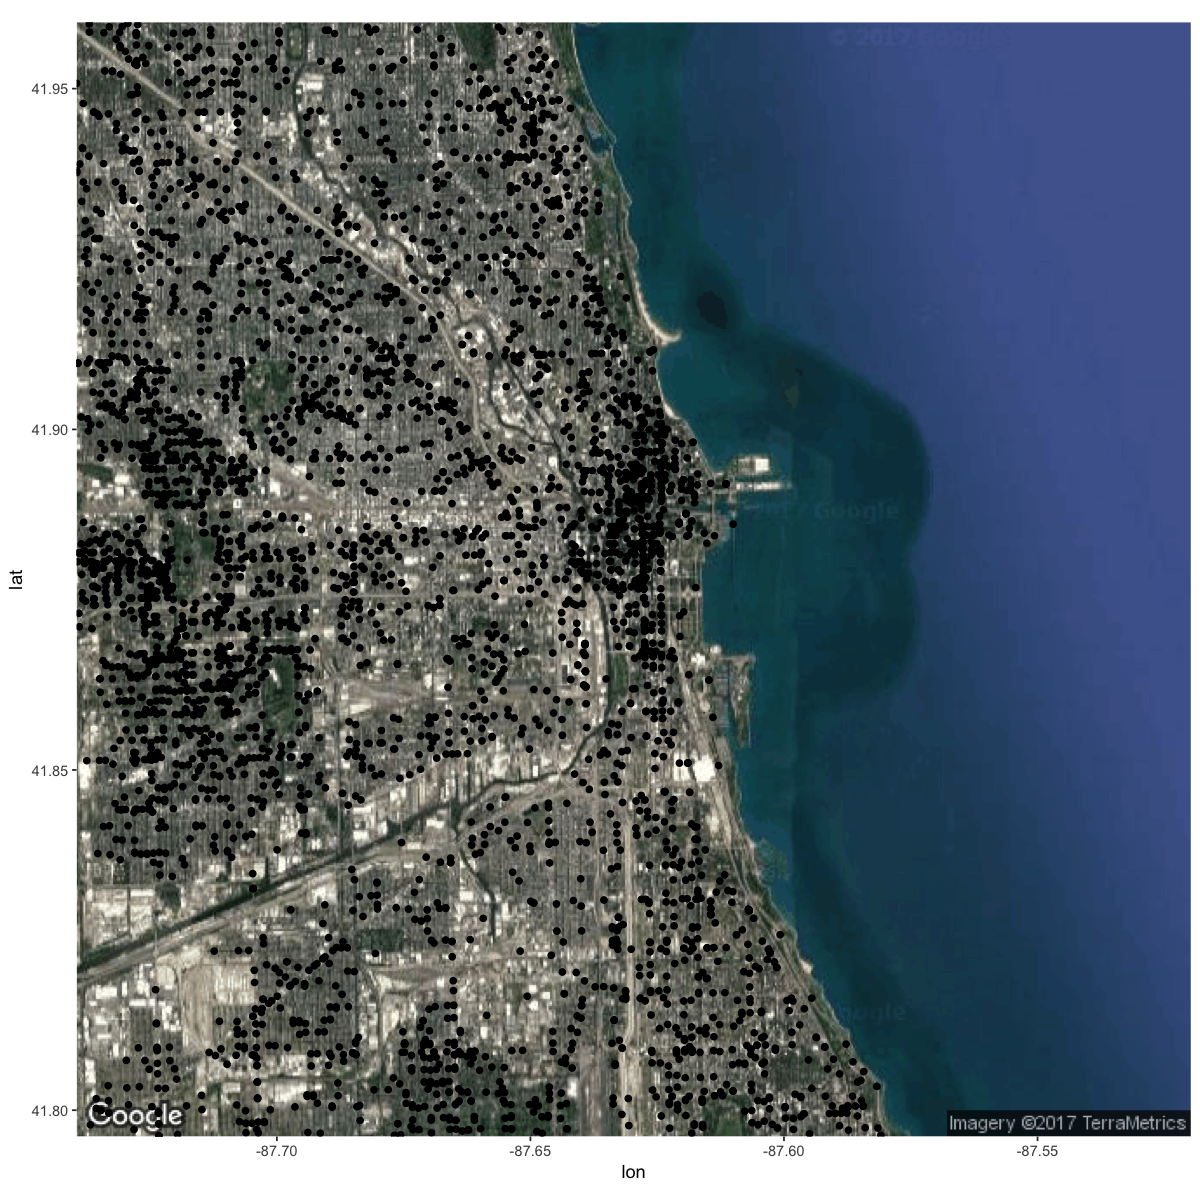

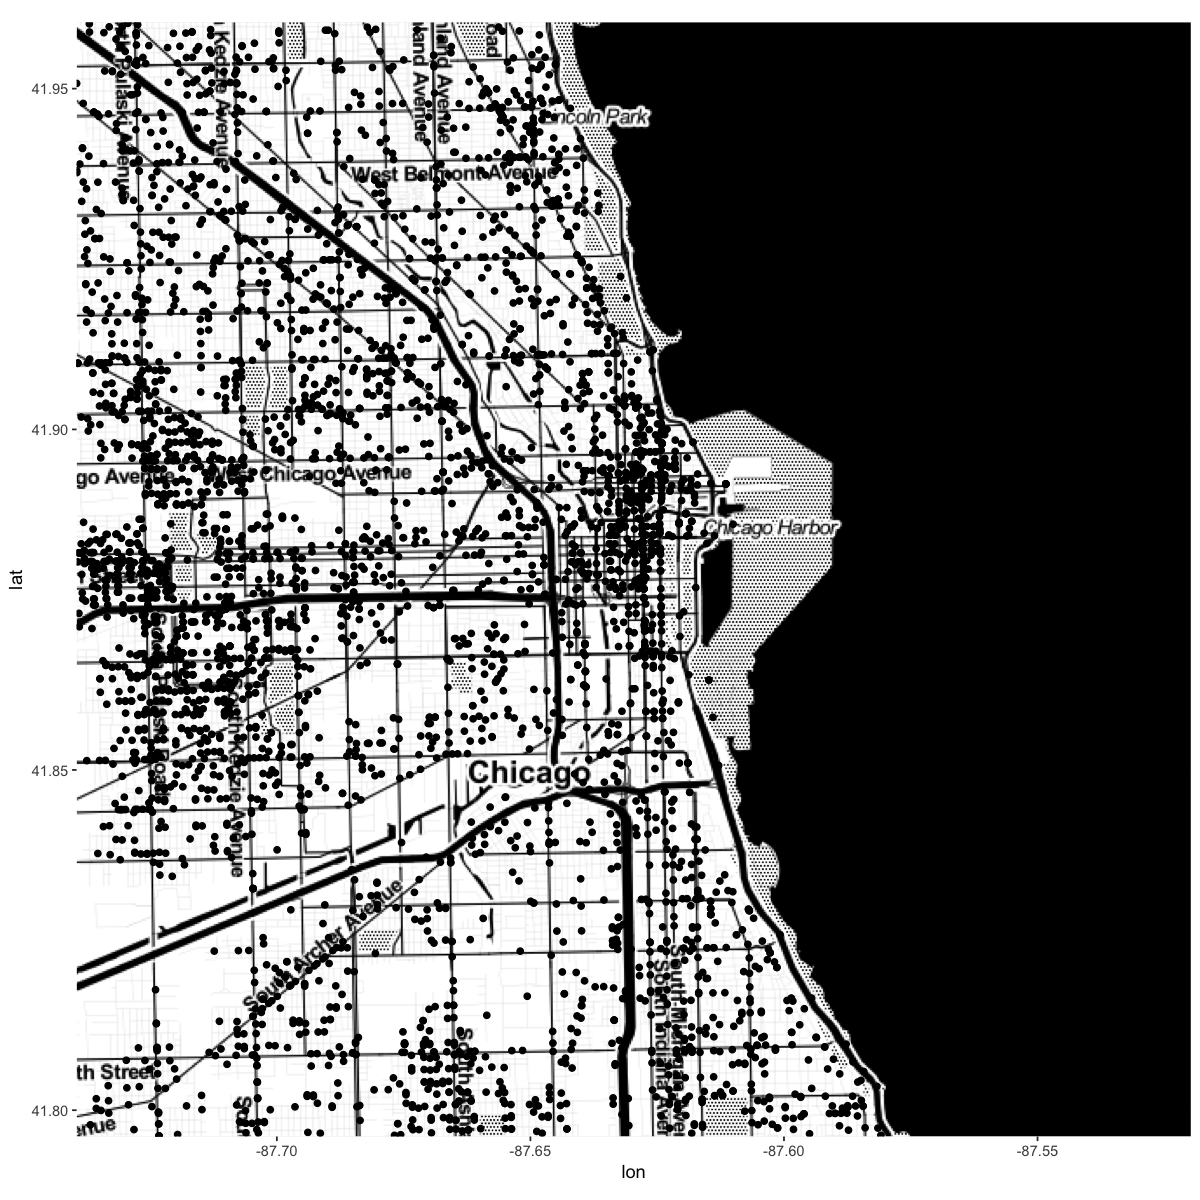

In [9]:
options(repr.plot.width=10, repr.plot.height=10)

chicagoMap_sat <- get_map('chicago', zoom=12, scale=1, maptype='satellite')#, source='stamen')
ggmap(chicagoMap_sat) +
    geom_point(aes(x=Longitude, y=Latitude), data=crimeData)

chicagoMap_ton <- get_map('chicago', zoom=12, maptype='toner', source='stamen')
ggmap(chicagoMap_ton) +
    geom_point(aes(x=Longitude, y=Latitude), data=crimeData)

#### Bubble Chart - Point Plot of Crime.Type over the Map
-----

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=chicago&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chicago&sensor=false
Warning message:
“Removed 5683 rows containing missing values (geom_point).”

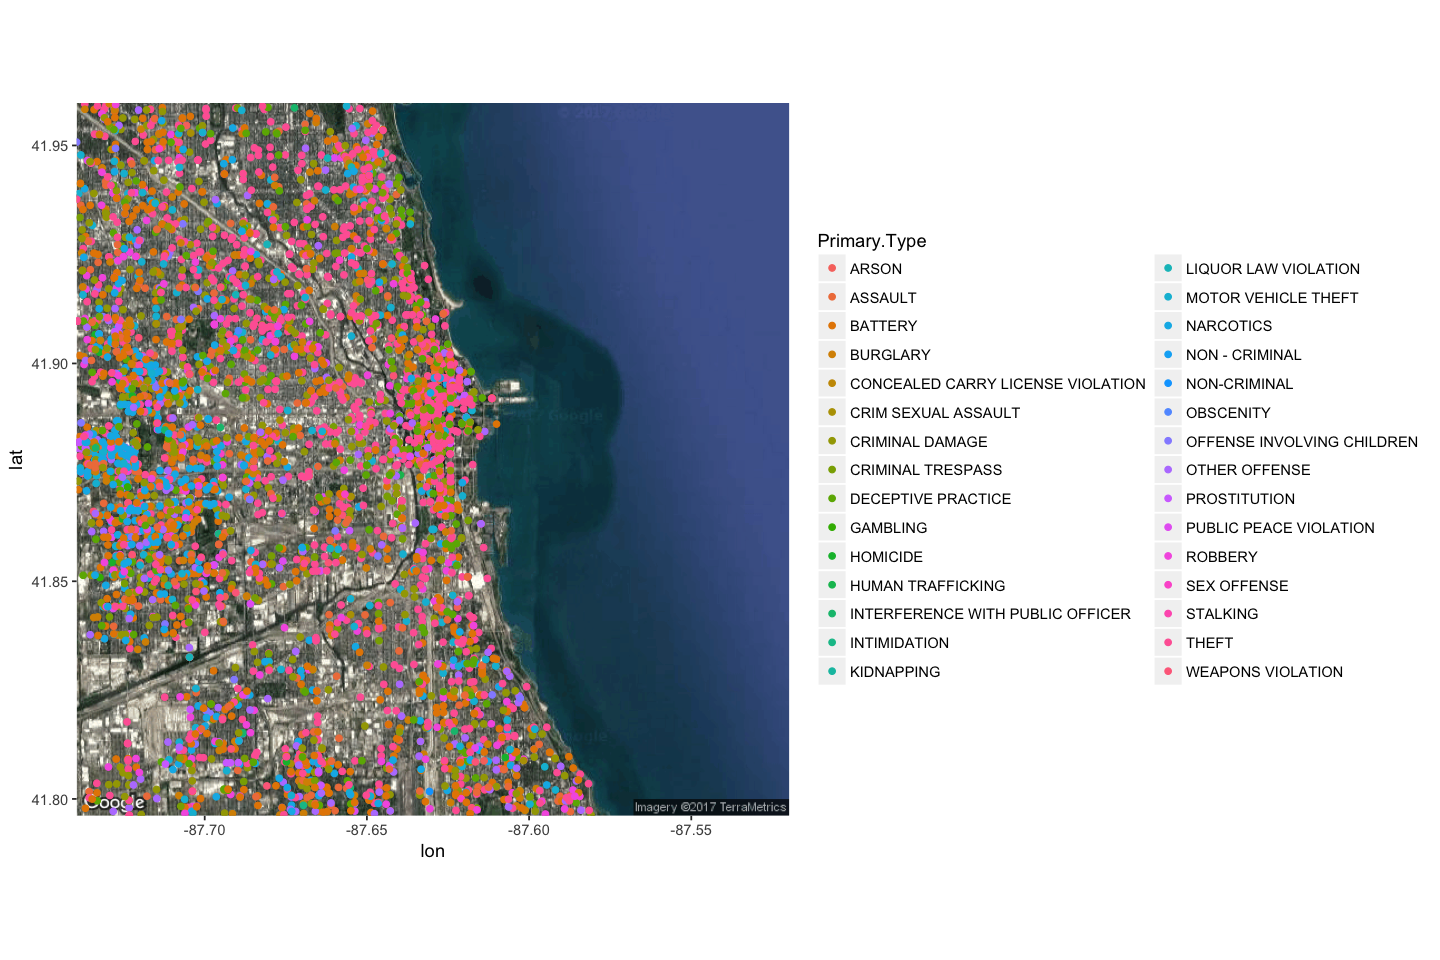

In [128]:
# Let us now Vizualize the type of crime using the Map
chcagoMap <- get_map('chicago', 
                     zoom=12,
                     color = "bw")

# increase the size of the Plot
options(repr.plot.width=12, repr.plot.height=8)
ggmap(chicagoMap) +
    geom_point(aes(x=Longitude, y=Latitude, 
                   color = Primary.Type,
                   fill = Primary.Type),
               data=crimeData)

#     facet_wrap(~ Primary.Type) +
#     theme(legend.position='None')
#     theme(legend.position="top", ) +
#     theme(text = element_text(size=12))
#     theme_bw(base_size = 5) 

#### Contour Plots: Bin Plots of Crime.Type over the Map
------

Warning message:
“Removed 5683 rows containing non-finite values (stat_bin2d).”Warning message:
“Removed 55 rows containing missing values (geom_tile).”

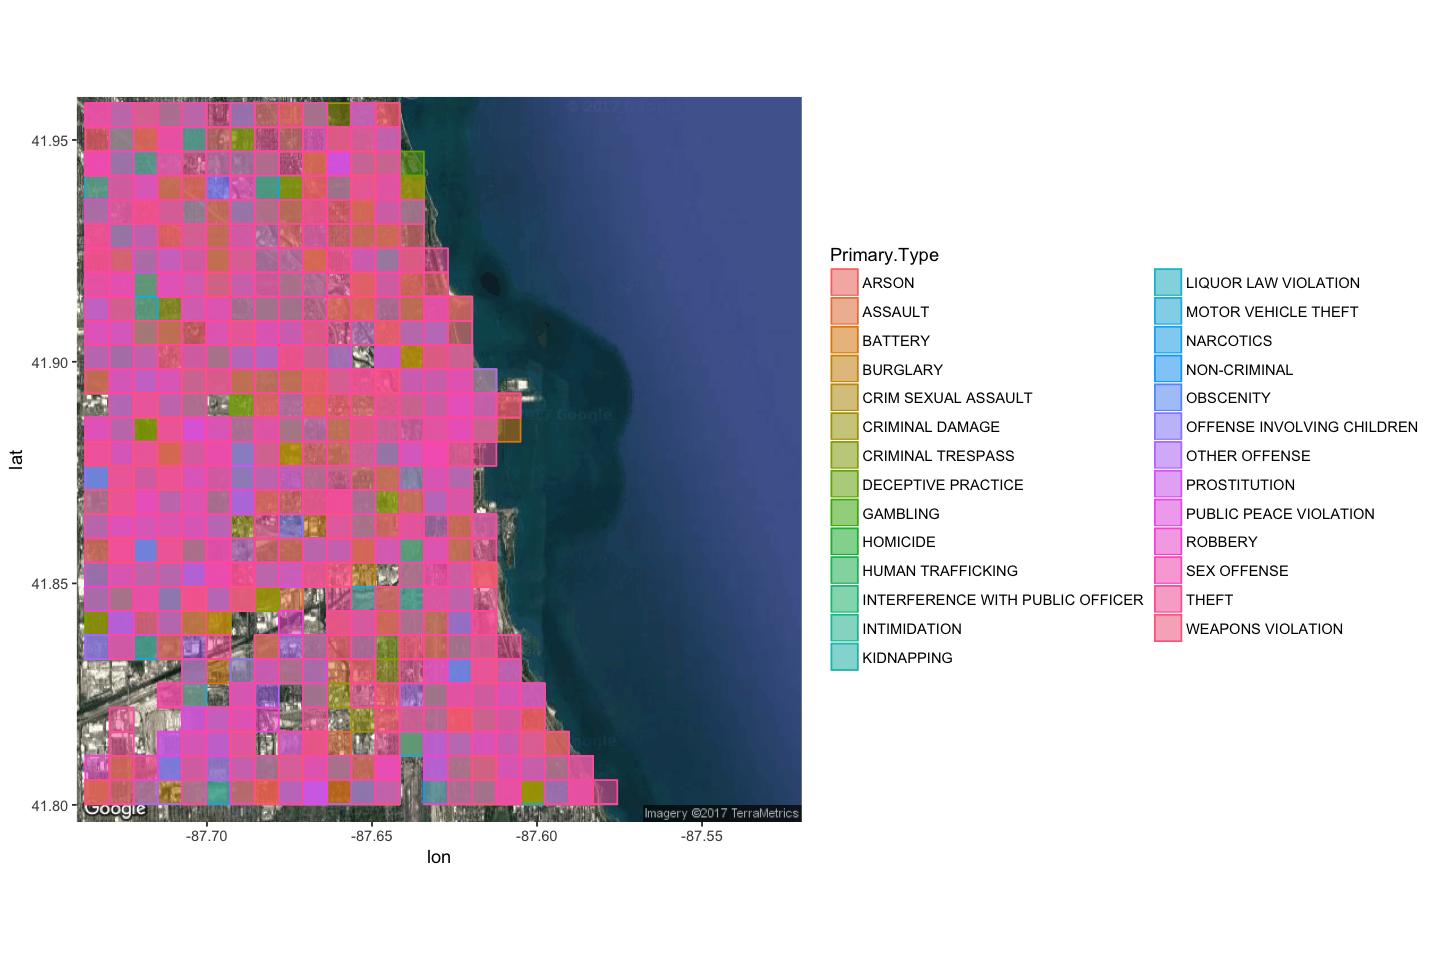

In [130]:
# The problem with points plot is that it will plot all the points in the map with different colors
# Which may make the plots a little messy. Also, since we have the size, some frequent type of crimes
# can oversignify in size. 
# So here we bin all the 

options(repr.plot.width=12, repr.plot.height=8)
ggmap(chicagoMap) +
    stat_bin2d(aes(x=Longitude, y=Latitude, 
                   color = Primary.Type,
                   fill = Primary.Type),
               size=0.5, 
               bins=30,
               alpha=1/2,
               data=crimeData)
#     theme(text = element_text(size=12), legend.position="topright")

# The combined power of ggmap and ggplot:
-------

* The difference with ggmap and ggplot syntax is that, when using ggmap we specify the aesthetics in the geom_point method, whereas, when using ggplot we specify the aesthetics in the ggplot() function. For Example, 
    * **ggplot** : ggplot(aes(x=Longitude, y=Latitude)) + geom_point()
    * **ggmap**  : ggmap(mapname) + geom_point(aes(x=Longitude, y=Latitude))
    
* The ggmap() function can be thaught of ploting the "map" in the background and the geom_points() function can be thaught as plotting the scatter points over the map.

This situation opens up a new problem, since we use the aesthetics in the geom_point, for any subsequent layer we have to again specify the data and aesthetics. So if we want to plot boxes on top of the map we have to specify the data again through ggmap function and then plot the boxes using geom_point.

This situation can be overcome by using base_layer argument in the ggmap() function, The ggmap() function takes the following argument:

    * ggmap(ggmap, extent='panel', base_layer, maparange=False, legend='right', padding=0.02, darken=c(0, "black"), .....)
    
So below we mention the code to handle such plots:    

Warning message:
“Removed 5683 rows containing missing values (geom_point).”

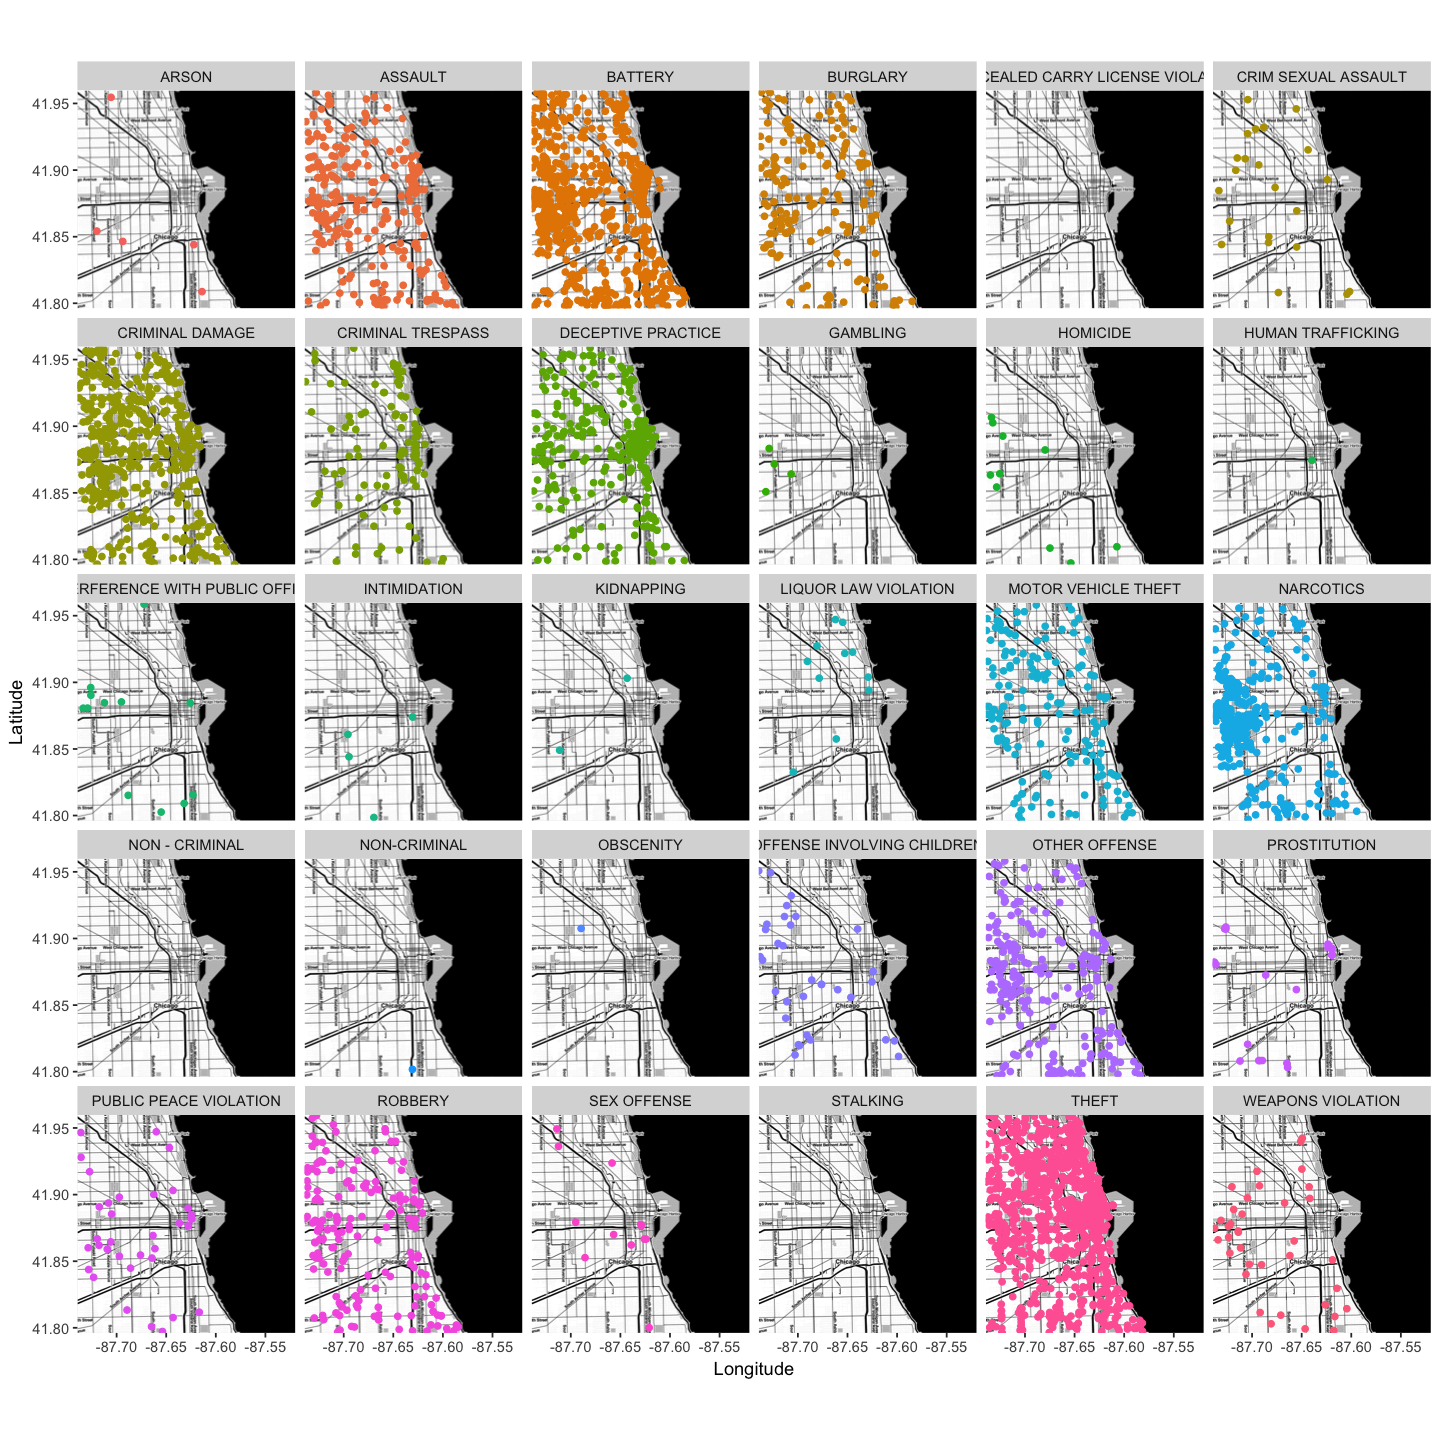

In [10]:
options(repr.plot.width=12, repr.plot.height=12)
ggmap(chicagoMap_ton, 
    base_layer = ggplot(crimeData, 
                        aes(x=Longitude, y=Latitude))) +    # This is the ggplot core used by base_layer
    geom_point(aes(color=Primary.Type, fill = Primary.Type)) +
    facet_wrap(~ Primary.Type) +
    theme(legend.position="none")